In [35]:
# Importing necessary libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud

# Setting the default plotly template
pio.templates.default = "plotly_white"

# Load the dataset
#df = pd.read_csv("Instagram data.csv")
df = pd.read_csv("Instagram data.csv", encoding='ISO-8859-1')

In [36]:
# Q.1: Show column names and have a look at their info
print("Column Names:")
print(df.columns)
print("Column Info:")
print(df.info())

Column Names:
Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')
Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    obje

In [37]:
# Q.2: Show the descriptive statistics of the data
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205

In [38]:
# Q.3: Check if your data contains any missing values
print("Missing Values Check:")
print(df.isnull().sum())

Missing Values Check:
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


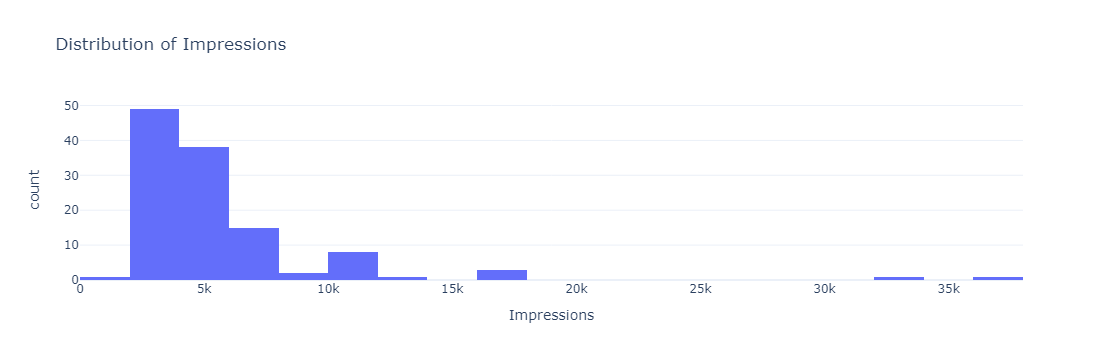

In [39]:
# Plotting the distribution of Impressions using a histogram
fig = px.histogram(df, x='Impressions', title='Distribution of Impressions')
fig.show()

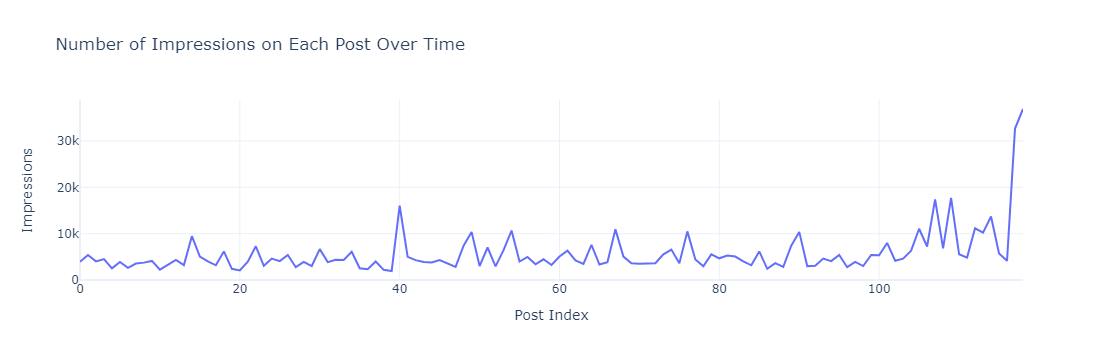

In [40]:
# Plotting the number of impressions on each post over time
fig = px.line(df, y='Impressions', title='Number of Impressions on Each Post Over Time')
fig.update_xaxes(title='Post Index')
fig.update_yaxes(title='Impressions')
fig.show()

In [41]:
print(df.columns)

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')


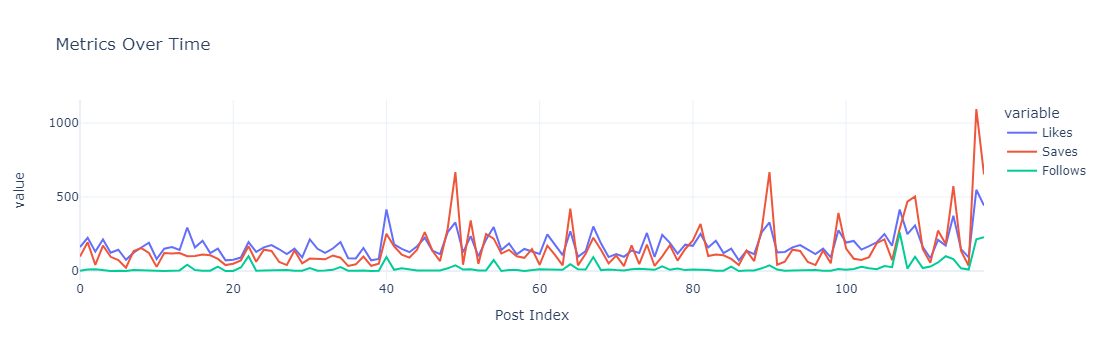

In [42]:
import numpy as np

# Create a new index representing post index
df['Post Index'] = np.arange(len(df))

# Plotting all metrics (Likes, Saves, and Follows) from each post over time
fig = px.line(df, x='Post Index', y=['Likes', 'Saves', 'Follows'], title='Metrics Over Time')
fig.show()

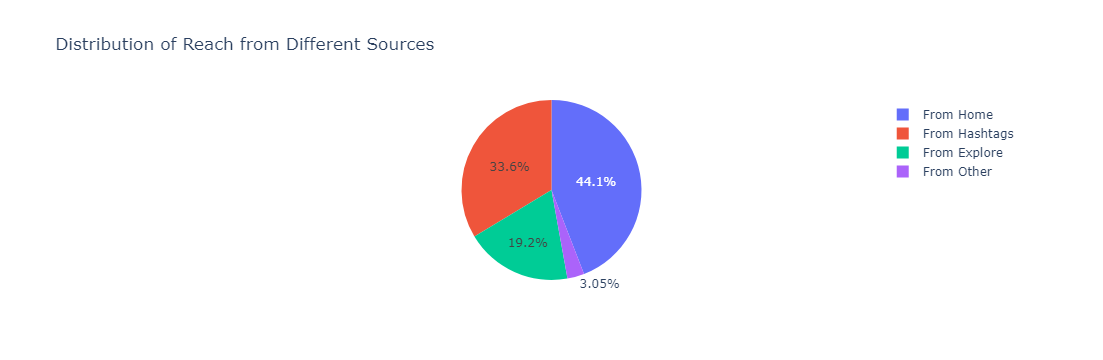

In [44]:
import pandas as pd
import plotly.express as px

# Aggregate the reach from different sources
reach_by_source = df[['From Home', 'From Hashtags', 'From Explore', 'From Other']].sum()

# Plotting the distribution of reach from different sources using a pie chart
fig = px.pie(reach_by_source, values=reach_by_source.values, names=reach_by_source.index,
             title='Distribution of Reach from Different Sources')
fig.show()


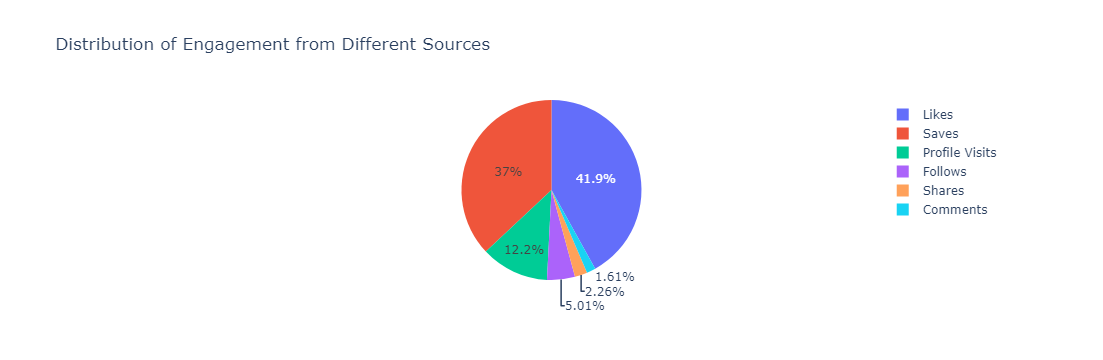

In [45]:
import pandas as pd
import plotly.express as px

# Aggregate the engagement from different sources
engagement_sources = ['Likes', 'Comments', 'Shares', 'Saves', 'Profile Visits', 'Follows']
engagement_by_source = df[engagement_sources].sum()

# Plotting the distribution of engagement from different sources using a pie chart
fig = px.pie(engagement_by_source, values=engagement_by_source.values, names=engagement_by_source.index,
             title='Distribution of Engagement from Different Sources')
fig.show()


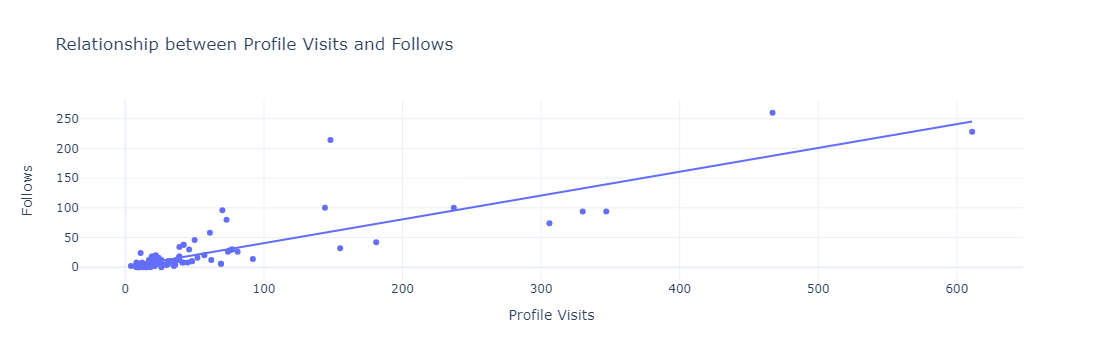

In [46]:
import plotly.express as px
import numpy as np

# Fit a linear regression model
coefficients = np.polyfit(df['Profile Visits'], df['Follows'], 1)
line = np.poly1d(coefficients)

# Generate x values for the line
x_values = np.linspace(df['Profile Visits'].min(), df['Profile Visits'].max(), len(df))

# Calculate corresponding y values using the linear model
y_values = line(x_values)

# Plotting the relationship between profile visits and follows with custom axis increments
fig = px.scatter(df, x='Profile Visits', y='Follows', 
                 title='Relationship between Profile Visits and Follows')

# Setting custom increments for 'Follows' axis
fig.update_yaxes(dtick=50)

# Setting custom increments for 'Profile Visits' axis
fig.update_xaxes(dtick=100)

# Adding linear regression line
fig.add_trace(px.line(x=x_values, y=y_values).data[0])

fig.show()


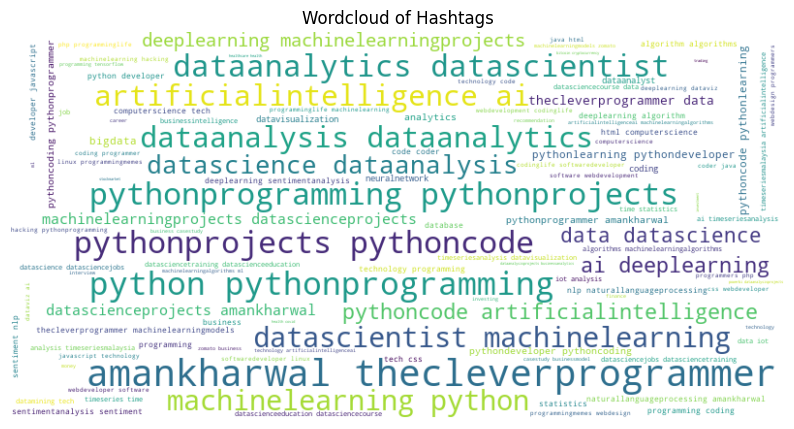

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all hashtags into a single string
hashtags_text = ' '.join(df['Hashtags'].dropna())

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags_text)

# Plot the wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud of Hashtags')
plt.axis('off')
plt.show()


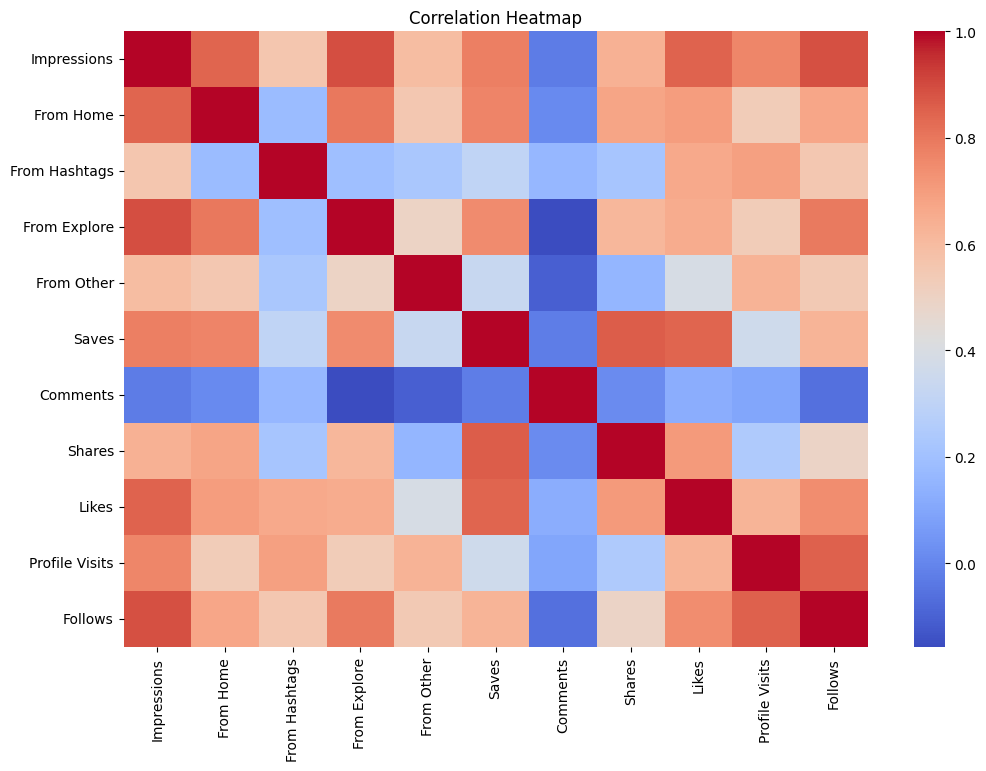

In [48]:
# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation heatmap without displaying correlation values
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


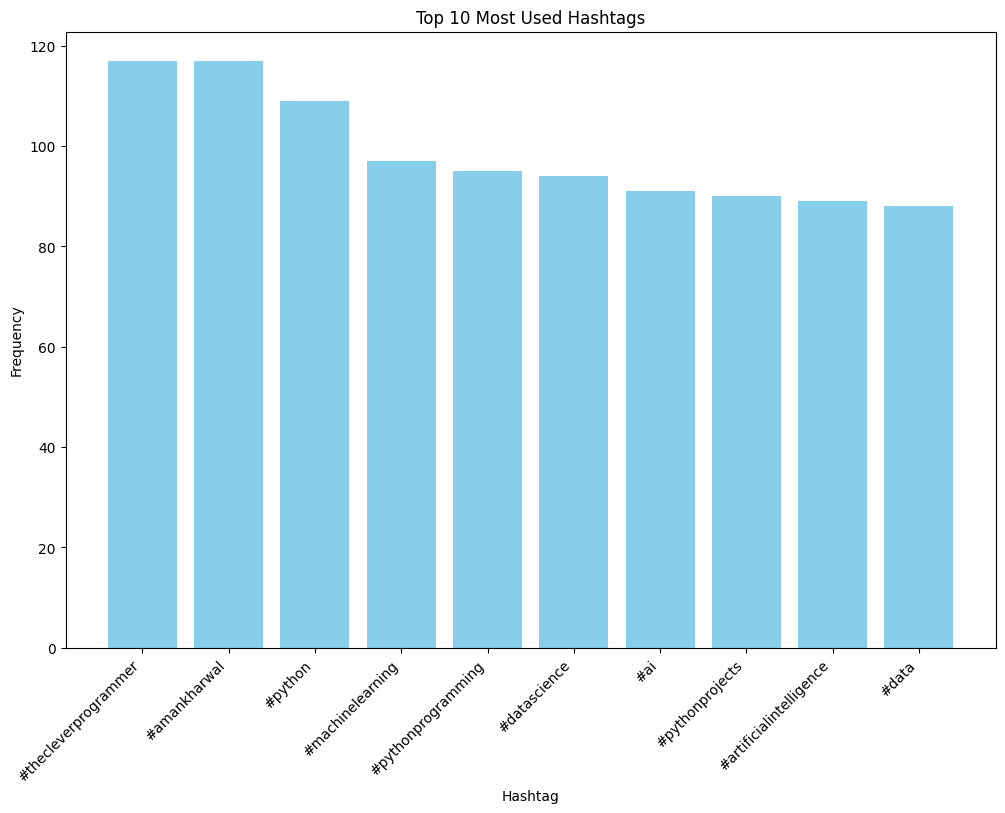

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Split the hashtags into individual tags and create a list
all_hashtags = df['Hashtags'].str.split(expand=True).stack()

# Count the frequency of each hashtag
hashtags_count = all_hashtags.value_counts().reset_index()
hashtags_count.columns = ['Hashtag', 'Frequency']

# Plot the distribution of hashtags
plt.figure(figsize=(12, 8))
plt.bar(hashtags_count['Hashtag'][:10], hashtags_count['Frequency'][:10], color='skyblue')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Hashtags')
plt.xticks(rotation=45, ha='right')
plt.show()


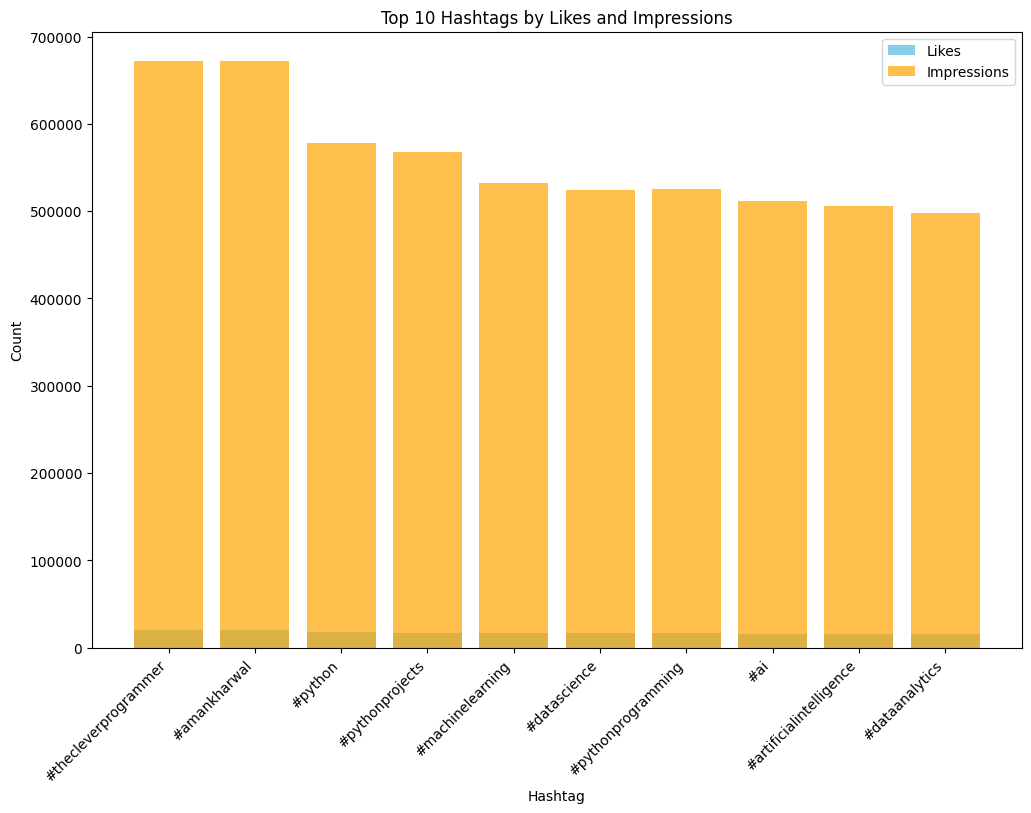

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Create an empty list to store dictionaries for each hashtag
hashtags_data = []

# Split the hashtags into individual tags and iterate over each post
for index, row in df.iterrows():
    hashtags = row['Hashtags'].split()
    likes = row['Likes']
    impressions = row['Impressions']
    for hashtag in hashtags:
        # Check if the hashtag is already in the list
        existing_hashtag = next((item for item in hashtags_data if item['Hashtag'] == hashtag), None)
        if existing_hashtag:
            # Update likes and impressions for existing hashtag
            existing_hashtag['Likes'] += likes
            existing_hashtag['Impressions'] += impressions
        else:
            # Add new hashtag to the list
            hashtags_data.append({'Hashtag': hashtag, 'Likes': likes, 'Impressions': impressions})

# Create a DataFrame from the list of hashtag dictionaries
hashtags_likes_impressions = pd.DataFrame(hashtags_data)

# Sort the DataFrame by likes
hashtags_likes_impressions = hashtags_likes_impressions.sort_values(by='Likes', ascending=False)

# Plot the distribution of likes and impressions for each hashtag
plt.figure(figsize=(12, 8))
plt.bar(hashtags_likes_impressions['Hashtag'][:10], hashtags_likes_impressions['Likes'][:10], color='skyblue', label='Likes')
plt.bar(hashtags_likes_impressions['Hashtag'][:10], hashtags_likes_impressions['Impressions'][:10], color='orange', alpha=0.7, label='Impressions')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.title('Top 10 Hashtags by Likes and Impressions')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()
